In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
import nltk


In [1]:
ruta = '../DATASETS/review_filtered.csv'

In [31]:
df_businnes = pd.read_csv('../DATASETS/business_corregido.csv')

In [3]:
df_review = pd.read_csv(ruta)
df_review

,Unnamed: 0,review_id,user_id,business_id,stars,useful,text,date
0,5,z0osLHDvXvzfm57D4DmD2Q,xVKE_HJ2pwUtTdLbL3pnCg,S2Ho8yLxhKAa26pBAm6rxA,3,0,"Service was crappy, and food was mediocre. I ...",2016-11-22 00:22:53
1,24,tXHWJWnTdrraHGUqaPWj3g,zKAHSNzqvwsyoFCw3QpafA,S2Ho8yLxhKAa26pBAm6rxA,4,0,Enjoyed my fish out at a sidewalk table. A bi...,2018-05-19 01:14:05
2,28,PPgbLBvi34A6m7bKJfTwhw,3TL6HZ1JrKcNTvGDWKlrow,GyC36Pn0Q1-qHnqXys6yFg,1,0,Service and management terrible... After messi...,2013-12-07 13:17:13
3,57,dQ3EU6cevDqHAr_ygy1O8A,CNyXcn0c0V5CFmigqqw-Xg,oY5LFo6Yxxf32ePna6mEUQ,5,1,"I absolutely love this place!\n\nGreat hours, ...",2014-12-30 17:55:51
4,71,22n_UbOS_iqKKR3IrYhNGw,N1gb_Cx98QrcfA4CPrkY2w,QkyEr9j7il9lJqseTbPe5w,1,1,"I went here when if first opened, and have nev...",2013-05-29 02:17:04
...,...,...,...,...,...,...,...,...
28952,553268,t0UrDu825RGPsLuKXMT6bg,dYJPAlkQx_K7WVfbg3aj7A,lNsnmur2Df2oK9ywyY0H3g,3,6,I've been here several times before for dinner...,2015-04-12 14:32:07
28953,553279,4w_AUydQp9lncMDY5FTRWg,eJnwyot0rLyWN84DwyC0RA,vrQCClTDrPSbIHO-ub8qFg,4,6,"I have been eating at Sardi's for awhile, pre...",2018-05-07 20:08:20
28954,553300,-UFZX9OqpLGIGRuFXO9ISQ,-2p7YAwcCCeyfoCIsSrSow,vrQCClTDrPSbIHO-ub8qFg,3,5,"From the outside, this place doesn't look like...",2020-01-06 03:01:15
28955,553340,9rNq-bhaB5Wda1RYILFk7g,9X7nV5z6xPssvayASKJq7g,NQ01WqVX0tojNHKn-0sFww,4,1,Have been to Tir Na Nog for several late night...,2018-03-29 14:34:58


In [13]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


True

Procesamiento del texto

In [14]:
# Convertir texto a minúsculas
df_review["text"] = df_review["text"].str.lower()

# Eliminar puntuación y símbolos innecesarios
df_review["text"] = df_review["text"].str.replace("[^\w\s]", "")

# Eliminar stopwords 
from nltk.corpus import stopwords  
stop_words = stopwords.words('english')
df_review["text"] = df_review["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Lematización 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df_review["text"] = df_review["text"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


In [16]:
df_review["sentiment"] = df_review["text"].apply(analyzer.polarity_scores)

# Access sentiment scores directly (assuming order is consistent)
df_review["compound"] = df_review["sentiment"].tolist()[0]["compound"]
df_review["pos"] = df_review["sentiment"].tolist()[0]["pos"]
df_review["neg"] = df_review["sentiment"].tolist()[0]["neg"]
df_review["neu"] = df_review["sentiment"].tolist()[0]["neu"]


In [18]:
df_review

,Unnamed: 0,review_id,user_id,business_id,stars,useful,text,date,sentiment,compound,pos,neg,neu
0,5,z0osLHDvXvzfm57D4DmD2Q,xVKE_HJ2pwUtTdLbL3pnCg,S2Ho8yLxhKAa26pBAm6rxA,3,0,"service crappy, food mediocre. wish would pick...",2016-11-22 00:22:53,"{'neg': 0.235, 'neu': 0.588, 'pos': 0.176, 'co...",-0.2263,0.176,0.235,0.588
1,24,tXHWJWnTdrraHGUqaPWj3g,zKAHSNzqvwsyoFCw3QpafA,S2Ho8yLxhKAa26pBAm6rxA,4,0,enjoyed fish sidewalk table. bit pricey food g...,2018-05-19 01:14:05,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",-0.2263,0.176,0.235,0.588
2,28,PPgbLBvi34A6m7bKJfTwhw,3TL6HZ1JrKcNTvGDWKlrow,GyC36Pn0Q1-qHnqXys6yFg,1,0,service management terrible... messing 4 order...,2013-12-07 13:17:13,"{'neg': 0.312, 'neu': 0.605, 'pos': 0.083, 'co...",-0.2263,0.176,0.235,0.588
3,57,dQ3EU6cevDqHAr_ygy1O8A,CNyXcn0c0V5CFmigqqw-Xg,oY5LFo6Yxxf32ePna6mEUQ,5,1,"absolutely love place! great hours, impeccably...",2014-12-30 17:55:51,"{'neg': 0.0, 'neu': 0.21, 'pos': 0.79, 'compou...",-0.2263,0.176,0.235,0.588
4,71,22n_UbOS_iqKKR3IrYhNGw,N1gb_Cx98QrcfA4CPrkY2w,QkyEr9j7il9lJqseTbPe5w,1,1,"went first opened, never desired go back again...",2013-05-29 02:17:04,"{'neg': 0.226, 'neu': 0.645, 'pos': 0.129, 'co...",-0.2263,0.176,0.235,0.588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28952,553268,t0UrDu825RGPsLuKXMT6bg,dYJPAlkQx_K7WVfbg3aj7A,lNsnmur2Df2oK9ywyY0H3g,3,6,"i've several time dinner, recently negative ex...",2015-04-12 14:32:07,"{'neg': 0.07, 'neu': 0.722, 'pos': 0.208, 'com...",-0.2263,0.176,0.235,0.588
28953,553279,4w_AUydQp9lncMDY5FTRWg,eJnwyot0rLyWN84DwyC0RA,vrQCClTDrPSbIHO-ub8qFg,4,6,"eating sardi's awhile, pretty much since opene...",2018-05-07 20:08:20,"{'neg': 0.064, 'neu': 0.751, 'pos': 0.185, 'co...",-0.2263,0.176,0.235,0.588
28954,553300,-UFZX9OqpLGIGRuFXO9ISQ,-2p7YAwcCCeyfoCIsSrSow,vrQCClTDrPSbIHO-ub8qFg,3,5,"outside, place look like big deal. man chicken...",2020-01-06 03:01:15,"{'neg': 0.046, 'neu': 0.726, 'pos': 0.228, 'co...",-0.2263,0.176,0.235,0.588
28955,553340,9rNq-bhaB5Wda1RYILFk7g,9X7nV5z6xPssvayASKJq7g,NQ01WqVX0tojNHKn-0sFww,4,1,tir na nog several late night also nfl playoff...,2018-03-29 14:34:58,"{'neg': 0.016, 'neu': 0.668, 'pos': 0.316, 'co...",-0.2263,0.176,0.235,0.588


### Cálculo del KPI

In [19]:
# Pondera la puntuación con el número de votos útiles (opcional)
df_review["weighted_sentiment"] = df_review["compound"] * df_review["useful"]

In [20]:
kpi_sentimiento = (df_review["weighted_sentiment"].mean() * 0.7) + (df_review["pos"].mean() * 0.3)

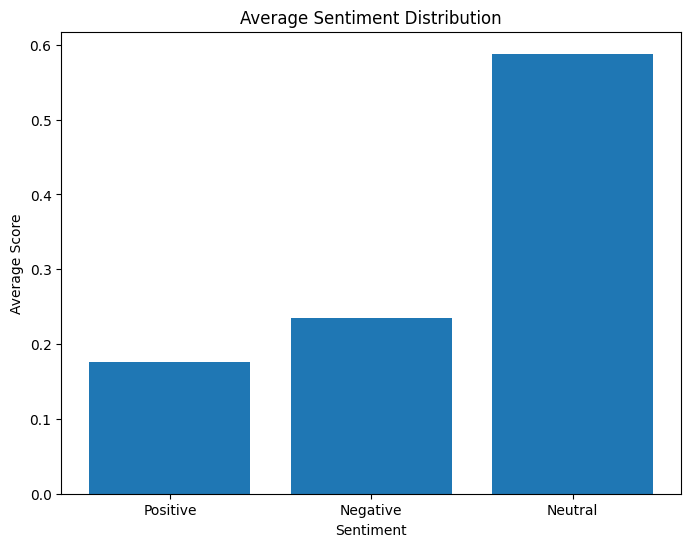

In [22]:
# Diagrama de barras para emociones positivas, negativas y neutras
plt.figure(figsize=(8, 6))
plt.bar(["Positive", "Negative", "Neutral"], [df_review["pos"].mean(), df_review["neg"].mean(), df_review["neu"].mean()])
plt.xlabel("Sentiment")
plt.ylabel("Average Score")
plt.title("Average Sentiment Distribution")
plt.show()

In [23]:
print("KPI Compuesto:", kpi_sentimiento)

KPI Compuesto: -0.12738269054114726


Concatenamos

In [34]:
df_businnes = df_businnes[["business_id","name", "city", "state", "review_count", "categories"]]

In [35]:
df_comb = pd.merge(df_review, df_businnes, how="inner", on="business_id")

In [42]:
# Sort DataFrame by review_count (descending order - Top 10)
top_10_businesses = df_comb.sort_values(by='review_count', ascending=False).head(10)

# Add additional columns (assuming they exist in your dataset)
top_10_businesses = top_10_businesses[['review_id', 'user_id', 'business_id', 'stars', 'useful', 'text', 
                                       'date', 'name', 'city', 'state', 'categories']]

# Sentiment Analysis (if not already done)
if 'sentiment' not in top_10_businesses.columns:
    analyzer = SentimentIntensityAnalyzer()
    top_10_businesses['sentiment'] = top_10_businesses["text"].apply(analyzer.polarity_scores)
    top_10_businesses["compound"] = top_10_businesses["sentiment"].tolist()[0]["compound"]
    top_10_businesses["pos"] = top_10_businesses["sentiment"].tolist()[0]["pos"]
    top_10_businesses["neg"] = top_10_businesses["sentiment"].tolist()[0]["neg"]
    top_10_businesses["neu"] = top_10_businesses["sentiment"].tolist()[0]["neu"]

# Print the results (consider using to_csv() to save as a file)
print(top_10_businesses.to_string())


                   review_id                 user_id             business_id  stars  useful                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              text                 date                                  name       city state                                              categories                                                        sentiment  comp

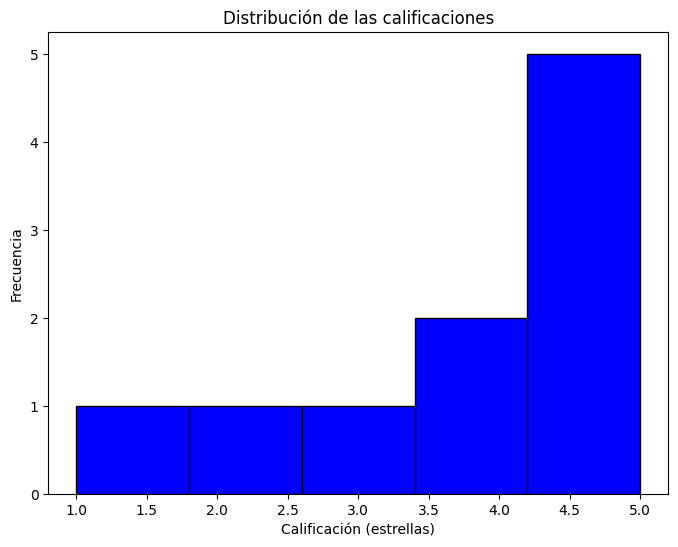

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(top_10_businesses['stars'], bins=5, color='b', edgecolor='k')
plt.xlabel('Calificación (estrellas)')
plt.ylabel('Frecuencia')
plt.title('Distribución de las calificaciones')
plt.show()
